<a href="https://colab.research.google.com/github/shearere2/Miscellaneous/blob/main/Shearer_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [149]:
y = runif(10000)

In [150]:
x = 10 * y + 5

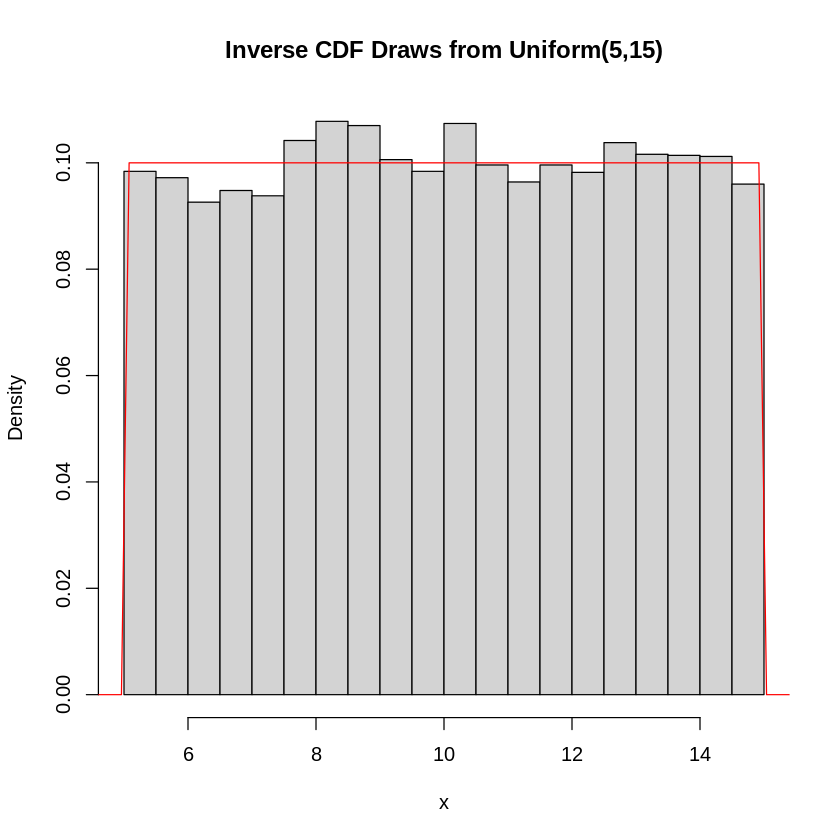

In [151]:
hist(x, probability=T, main='Inverse CDF Draws from Uniform(5,15)')
curve(dunif(x, min=5, max=15), from=4, to=16, col='red', add=T)

In [152]:
mean(x)

[1] 10.02357

Question 2

In [171]:
y = runif(10000)

In [172]:
x = tan(pi*(y-0.5))

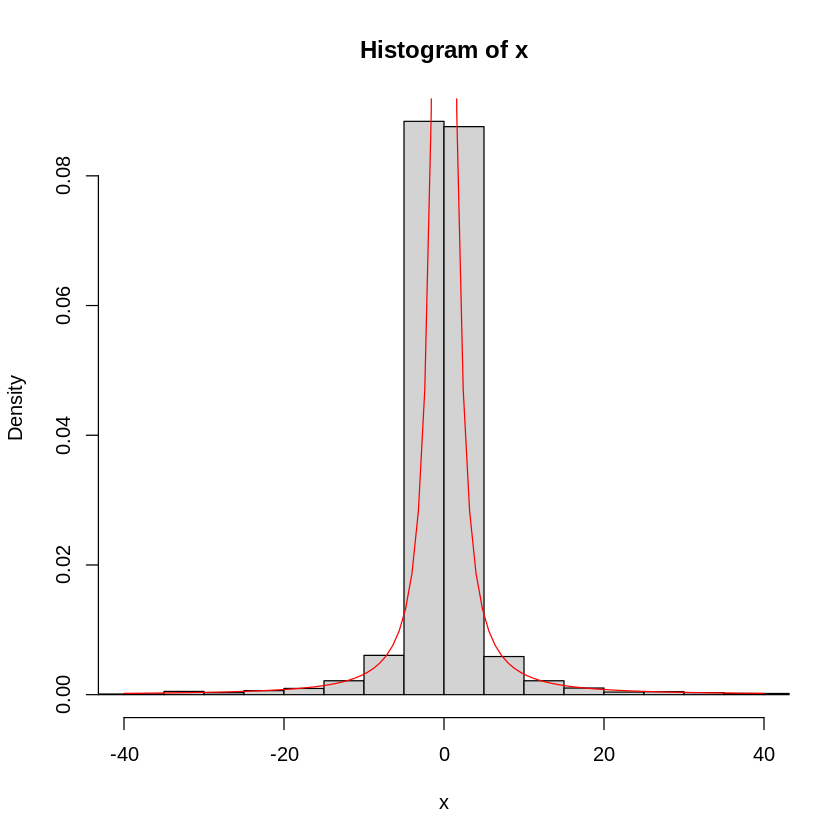

In [173]:
hist(x, probability=T, breaks=2000, xlim=c(-40,40))
curve(dcauchy(x), add=T, col='red', from=-40, to=40)

Question 3

In [174]:
gamma_question = function(lam, alpha){
  nums = c()
  for (i in 1:alpha){
    y = runif(1)
    nums = c(nums, x = (-1/lam)*log(1-y))
  }
  return(sum(nums))
}

In [175]:
samples = c()
for (i in  1: 10000){
  samples = c(samples, gamma_question(4, 12))
}

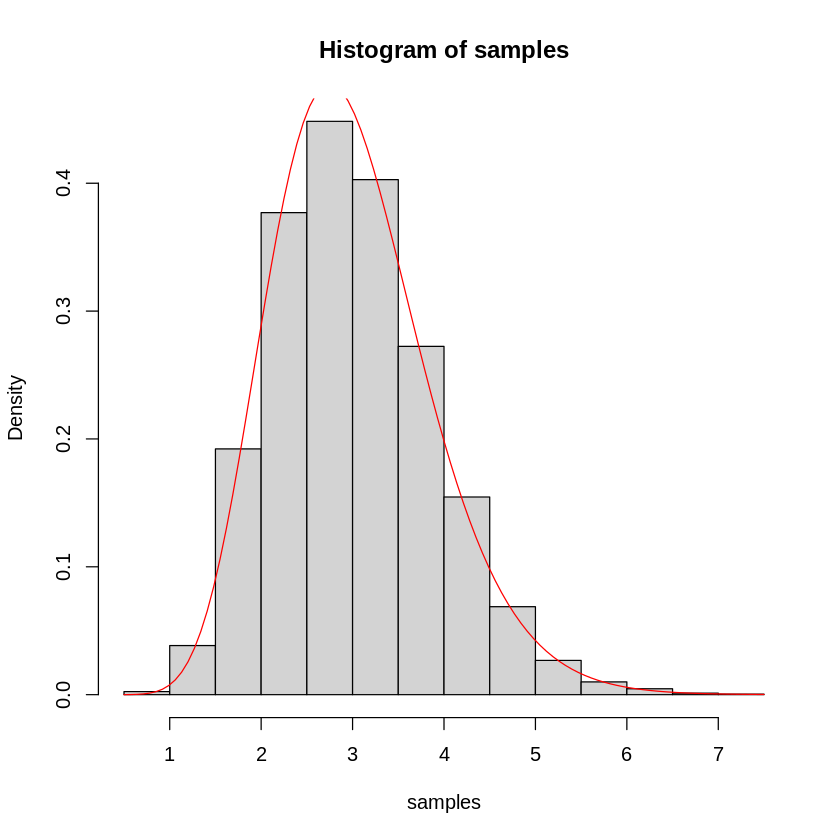

In [176]:
hist(samples, probability=T)
curve(dgamma(x, shape=12, rate=4), add=T, col='red')

In [177]:
mean(samples)

[1] 3.010827

Question 4

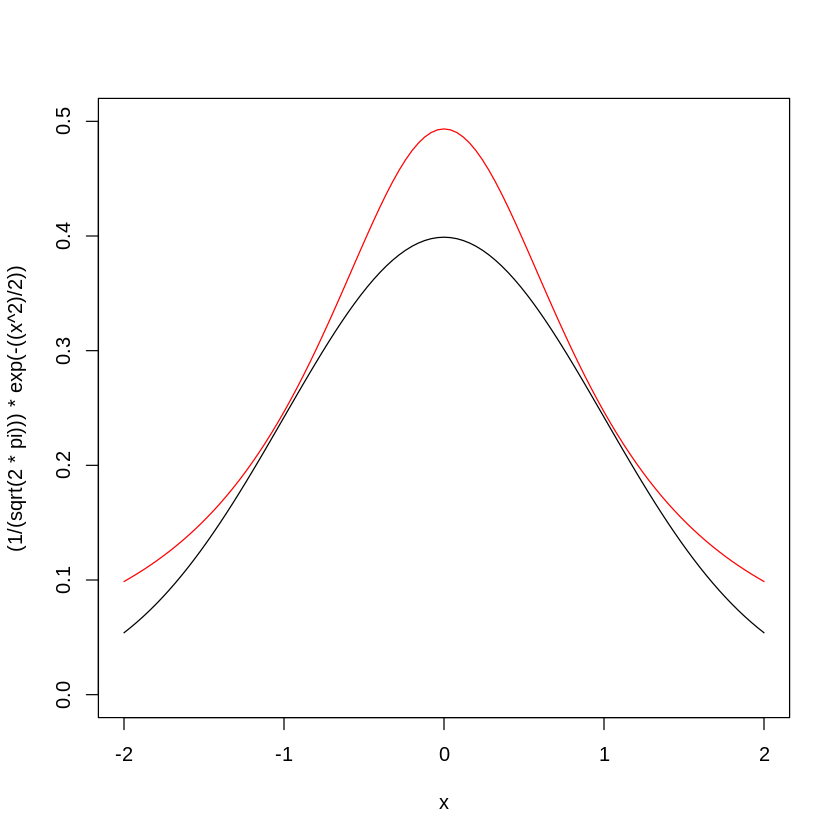

In [178]:
curve((1/(sqrt(2*pi)))*exp(-((x^2)/2)), xlim=c(-2,2), ylim=c(0,0.5))
curve(1.55*(1/(pi*(1+(x^2)))), add=T, col='red') # A = 1.55

In [1]:
rejection_sampling = function(n_samples, A){
  # A = 6
  keep = c()
  cau = tan(pi*(runif(10000)-0.5))
  for (i in 1:n_samples){
    # Sample from q(x) function:
    x = cau[i]
    # Calculate probability of keeping: p = f(x)/(Aq(x))
    p = ((1/(sqrt(2*pi)))*exp(-((x^2)/2)))/(A*(1/(pi*(1+(x^2)))))
    # Generate u~unif(0,1)
    u = runif(n=1)
    # Decide whether to keep or reject
    if (u < p){
      # Keep
      keep = c(keep, x)
    }
    # Don't keep = just continue looping, not added
  }
  return(keep)
}
samples = rejection_sampling(10000, 1.55)

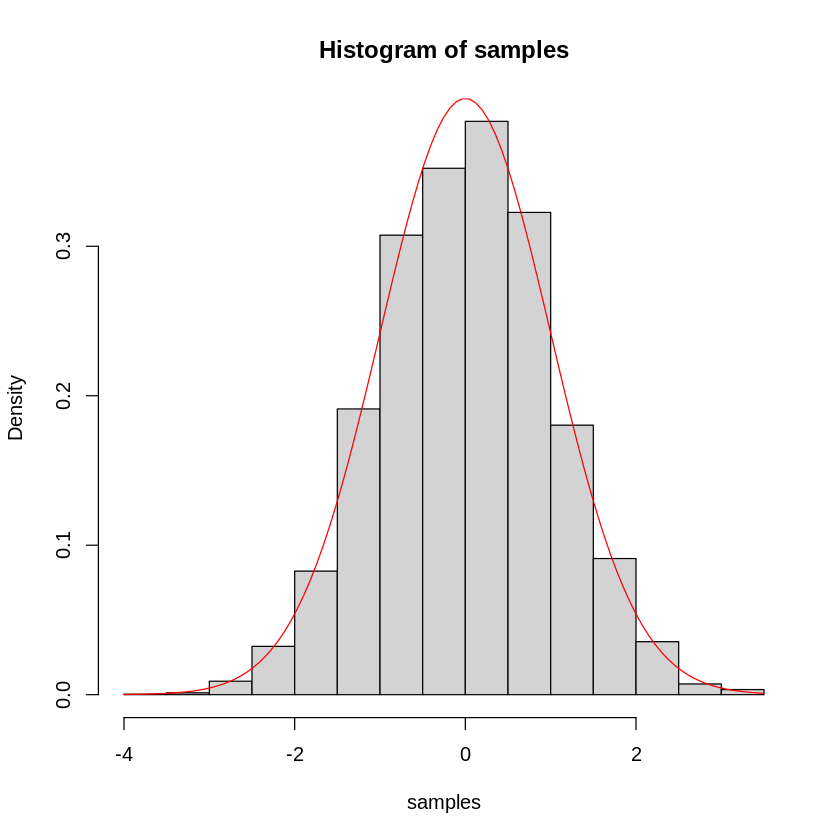

In [2]:
hist(samples, probability=T)
curve(dnorm(x), add=T, col='red')

In [181]:
length(samples) / 10000 # Only kept 1,663 of the 10000 samples. 16.63%

[1] 0.1599

Question 5

In [182]:
binomial_dist = function(){
  p = 0.02
  vals = c()
  for (n in 1:200){
    u = runif(1)
    if (u < p){
      vals = c(vals, 1)
    }
    else{
      vals = c(vals, 0)
    }
  }
  return(sum(vals))
}

In [183]:
samples = c()
for (i in 1:10000){
  samples = c(samples, binomial_dist())
}

In [184]:
mean(samples)

[1] 4.0223

In [185]:
var(samples)

[1] 3.807783

In [186]:
for (k in 0:2){
  trues = 0
  for (i in samples){
    if (i==k){
      trues = trues + 1
    }
  }
  cat('Probability of observing k = ')
  cat(k)
  cat(': ')
  cat(trues/length(samples))
  cat('\n')
}

Probability of observing k = 0: 0.0157
Probability of observing k = 1: 0.0657
Probability of observing k = 2: 0.1497


In [187]:
dbinom(0:2, size=200, prob=0.02) # Nice!

[1] 0.01758795 0.07178754 0.14577265

Question 6

In [189]:
poisson_dist = function(){
  y = runif(10000)
  lam = 2.1
  x = (-1/lam)*log(1-y)
  curr = 0
  count = 0
  for (i in x){
    if (curr + i > 1){
      return(count)
    }
    count = count + 1
    curr = curr + i
  }
}

In [190]:
samples = c()
for (i in 1:10000){
  samples = c(samples, poisson_dist())
}

for (k in 0:2){
  trues = 0
  for (i in samples){
    if (i==k){
      trues = trues + 1
    }
  }
  cat('Probability of observing k = ')
  cat(k)
  cat(': ')
  cat(trues/length(samples))
  cat('\n')
}

Probability of observing k = 0: 0.1235
Probability of observing k = 1: 0.2497
Probability of observing k = 2: 0.2678


In [191]:
dpois(0:2, lambda=2.1)

[1] 0.1224564 0.2571585 0.2700164